<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#Load-dataset" data-toc-modified-id="Load-dataset-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Load dataset</a></span></li><li><span><a href="#Training-PCA" data-toc-modified-id="Training-PCA-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Training PCA</a></span></li><li><span><a href="#Postprocessing" data-toc-modified-id="Postprocessing-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Postprocessing</a></span></li></ul></div>

# Introduction
<hr style = "border:2px solid black" ></hr>

In [ ]:
"""
What? PCA and eigenfaces

VanderPlas, Jake. Python data science handbook: Essential tools for working with data. "O'Reilly Media, Inc.", 2016.
https://github.com/jakevdp/PythonDataScienceHandbook
"""

# Imports
<hr style = "border:2px solid black" ></hr>

In [5]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set()
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA

# Load dataset

In [ ]:
"""
We are using the Labeled Faces in the Wild dataset made available through Scikit-Learn
"""

In [3]:
faces = fetch_lfw_people(min_faces_per_person=60) 
print(faces.target_names) 
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


# Training PCA

In [7]:
pca = PCA(150)
pca.fit(faces.data)

PCA(n_components=150)

# Postprocessing

In [ ]:
"""
In this case, it can be interesting to visualize the images associated with the first several principal 
components (these components are technically known as “eigenvec‐ tors,” so these types of images are often
called “eigenfaces”)
"""

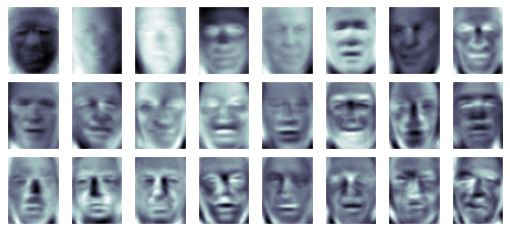

In [9]:
fig, axes = plt.subplots(3, 8, figsize=(9, 4),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1)) 
for i, ax in enumerate(axes.flat):
    ax.imshow(pca.components_[i].reshape(62, 47), cmap='bone')

In [ ]:
"""
The results are very interesting, and give us insight into how the images vary: for example, the first few
eigenfaces (from the top left) seem to be associated with the angle of lighting on the face, and later principal
vectors seem to be picking out certain features, such as eyes, noses, and lips. 

Let’s take a look at the cumulative variance of these components to see how much of the data information the 
projection is preserving. 
"""

Text(0, 0.5, 'cumulative explained variance')

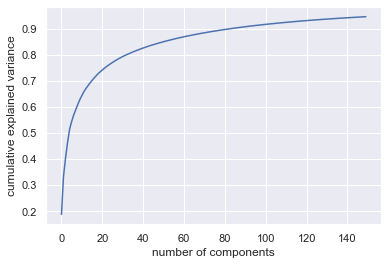

In [10]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')

In [ ]:
"""
We see that these 150 components account for just over 90% of the variance. That would lead us to believe that
using these 150 components, we would recover most of the essential characteristics of the data. 

To make this more concrete, we can compare the input images with the images reconstructed from these 150 components
"""

In [12]:
# Compute the components and projected faces
pca = PCA(150).fit(faces.data)
components = pca.transform(faces.data)
projected = pca.inverse_transform(components)

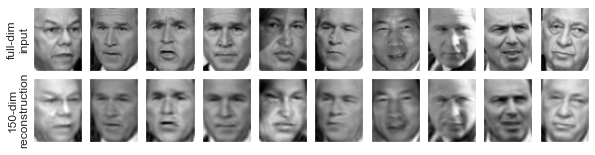

In [13]:
# Plot the results
fig, ax = plt.subplots(2, 10, figsize=(10, 2.5),
                       subplot_kw={'xticks': [], 'yticks': []},
                       gridspec_kw=dict(hspace=0.1, wspace=0.1))
for i in range(10):
    ax[0, i].imshow(faces.data[i].reshape(62, 47), cmap='binary_r')
    ax[1, i].imshow(projected[i].reshape(62, 47), cmap='binary_r')

    ax[0, 0].set_ylabel('full-dim\ninput')
ax[1, 0].set_ylabel('150-dim\nreconstruction')

In [ ]:
"""
The top row here shows the input images, while the bottom row shows the recon‐ struction of the images from just
150 of the ~3,000 initial features. This visualization makes clear why the PCA feature selection is so successful: 
although it reduces the dimensionality of the data by nearly a factor of 20, the projected images contain enough 
information that we might, by eye, recognize the individuals in the image. What this means is that our classification
algorithm needs to be trained on 150-dimensional data rather than 3,000-dimensional data, which depending on the 
particular algorithm we choose, can lead to a much more efficient classification.
"""